# 15 minute city - exploratory spatial data analysis

Following:
http://pysal.org/notebooks/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.html

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox

import esda
import pysal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Read local data

In [2]:
c = 'Guadalajara'

In [3]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Ciudad_15_min/'
nodes_15_min = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_nodes_vTotals.geojson', driver='GeoJSON')
print(nodes_15_min.shape)
nodes_15_min.head(2)

(195466, 112)


,osmid,metropolis,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,28751344,Guadalajara,0.0,3.909267,17.673810,5.763263,7.665959,7.275387,30.472684,16.857584,...,1,0.75,1,0.0,0,2,1.75,12,11.166667,POINT (-103.30631 20.71153)
1,28753224,Guadalajara,0.0,10.026280,5.894785,4.654675,9.018499,11.194589,18.117875,37.048139,...,1,0.75,1,0.0,0,2,1.75,11,10.416667,POINT (-103.31665 20.70065)


In [4]:
res = 8
hex_dist_res8 = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')
res = 9
hex_dist_res9 = gpd.read_file(grl_dir+f'Medio_Urbano/Analisis/{c}_15min_Analisis_HexRes{res}_vTotals.geojson', driver='GeoJSON')

In [5]:
print(hex_dist_res8.shape)
hex_dist_res8.head(2)

(1160, 111)


,hex_id_8,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,88498c9483fffff,0.0,21.054314,77.081654,15.462880,34.773808,8.015414,37.792083,66.408639,58.246391,...,1.0,0.475610,0.990244,0.0,0.0,1.990244,1.475610,10.648780,9.351626,"POLYGON ((-103.35482 20.74167, -103.35027 20.7..."
1,8849ab5933fffff,0.0,13.441838,35.545629,8.153209,33.899840,10.423998,24.711934,139.069620,32.786683,...,1.0,0.568436,1.000000,0.5,1.0,3.000000,2.068436,12.201117,10.905028,"POLYGON ((-103.40840 20.64992, -103.40387 20.6..."


In [6]:
print(hex_dist_res9.shape)
hex_dist_res9.head(2)

(6003, 111)


,hex_id_9,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,Social,raw_Actividad física,Actividad física,raw_Cultural,Cultural,Entretenimiento,raw_Entretenimiento,15_min_analysis,raw_15_min_analysis,geometry
0,8949aa252bbffff,0.0,82.776419,296.284598,11.509728,81.590992,77.138481,70.652399,261.494928,80.649753,...,1.0,0.25,1.0,0.0,0.0,2.0,0.768519,6.518519,4.537037,"POLYGON ((-103.40480 20.46253, -103.40358 20.4..."
1,8949ab5943bffff,0.0,39.076549,75.017473,17.406505,35.853914,20.820088,51.367568,197.413242,60.702885,...,1.0,0.25,1.0,0.5,1.0,3.0,1.750000,8.000000,6.555556,"POLYGON ((-103.40982 20.60369, -103.40860 20.6..."


## Inequality

In [214]:
import inequality
import libpysal

In [215]:
column_analysis = '15_min_analysis'

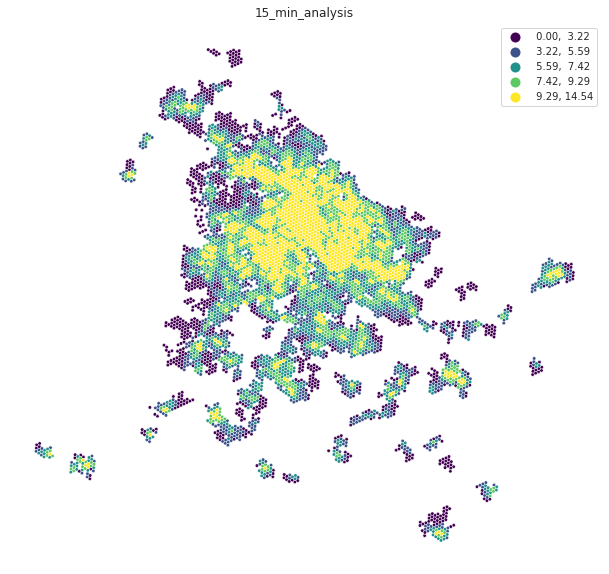

In [218]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})

hex_esda.plot(column=column_analysis,k=5, linewidth=0.4,
                   scheme='Quantiles',legend=True, ax=ax)

ax.set_title(column_analysis)

ax.set_axis_off()

In [219]:
gini_column_analysis = inequality.gini.Gini(hex_esda[column_analysis])

In [220]:
gini_column_analysis.g

0.2943358702066658

In [221]:
inequality.gini.Gini_Spatial

inequality.gini.Gini_Spatial

In [222]:
regimes = hex_esda[[column_analysis,'geometry']]

In [223]:
wq = libpysal.weights.Queen.from_dataframe(regimes)

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 30, 73, 74, 231, 700, 1093.
  warnings.warn(message)


In [224]:
gs = inequality.gini.Gini_Spatial(hex_esda[column_analysis],wq)

In [225]:
gs.p_sim

0.01

## Segregation

In [64]:
import segregation

/home/edgaregurrola/anaconda3/envs/odc/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
grl_dir = '/home/edgaregurrola/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/'
hex_pop = gpd.read_file(grl_dir+'Info_Sociodemografica/Analisis/Block_Census/Guadalajara_Census_10_20_BlockAnalysis_res9.geojson', driver='GeoJSON')
print(hex_pop.shape)
hex_pop.head(2)

(6003, 430)


,hex_id_9,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,Z_RTViv_10_20,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,R_TVivDes_10_20,DensPob_10_20,geometry
0,8949ab49dd3ffff,1213.0,619.0,594.0,57.0,18.0,28.0,1147.0,593.0,554.0,...,None,0.797235,0.168203,0.077868,0.0,None,0.797235,None,35.874628,"POLYGON ((-103.44558 20.81956, -103.44436 20.8..."
1,8949aa25017ffff,1616.0,832.0,784.0,75.0,30.0,36.0,1537.0,795.0,742.0,...,None,0.738994,0.218553,-0.214349,0.0,None,0.738994,None,42.049387,"POLYGON ((-103.42468 20.45386, -103.42346 20.4..."


In [68]:
hex_dist_pop_res9 = pd.merge(hex_dist_res9, hex_pop[['hex_id_9','pobtot']], on='hex_id_9')